Simple Linear Legression

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm


Reading the file

In [ ]:
# read csv file
data = pd.read_csv('expanded_post_secondary_dropout_dataset.csv')
data.head() # show the first five rows

,Student ID,Age,Gender,Marital Status,Application Mode,Application Order,Course,Attendance,Previous Qualification,Nationality,...,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,On-Campus,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
0,1,36,Other,Married,Transfer,4,Law,Evening,Master,Domestic,...,8,2.7,61,2,Yes,9,2,5,20,1
1,2,43,Male,Divorced,Special admission,2,Medicine,Daytime,Master,Domestic,...,4,3.5,77,3,Yes,28,2,3,27,1
2,3,44,Female,Widowed,Special admission,6,Arts,Daytime,High School,Domestic,...,7,1.1,77,5,No,1,2,2,21,1
3,4,18,Male,Divorced,In-person,4,Business,Daytime,Bachelor,Domestic,...,17,2.7,81,4,Yes,14,10,4,7,0
4,5,28,Female,Divorced,In-person,2,Arts,Daytime,Master,International,...,4,1.3,92,0,Yes,3,1,2,18,1


In [ ]:
#extraordinary data analysis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student ID                 2600 non-null   int64  
 1   Age                        2600 non-null   int64  
 2   Gender                     2600 non-null   object 
 3   Marital Status             2600 non-null   object 
 4   Application Mode           2600 non-null   object 
 5   Application Order          2600 non-null   int64  
 6   Course                     2600 non-null   object 
 7   Attendance                 2600 non-null   object 
 8   Previous Qualification     2600 non-null   object 
 9   Nationality                2600 non-null   object 
 10  Mother Qualification       2600 non-null   object 
 11  Father Qualification       2600 non-null   object 
 12  Mother Occupation          2600 non-null   object 
 13  Father Occupation          2600 non-null   objec

,Student ID,Age,Application Order,HS GPA,Test Score,Family Income,Financial Aid,Credits Attempted,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1300.500000,31.697308,4.907308,3.009077,74.448077,84056.434615,12460.473846,13.438077,6.654231,2.009615,80.207692,2.490000,14.973077,5.600000,2.448077,22.805769,0.861538
std,750.699674,8.109931,2.593586,0.577308,14.498557,37097.409105,7143.306002,2.883664,4.557366,1.150887,11.860804,1.689856,8.951756,2.856986,1.726933,10.361806,0.345450
min,1.000000,18.000000,1.000000,2.000000,50.000000,20011.000000,19.000000,9.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,650.750000,25.000000,3.000000,2.500000,61.000000,52561.500000,6381.750000,11.000000,3.000000,1.000000,70.000000,1.000000,7.000000,3.000000,1.000000,14.000000,1.000000
50%,1300.500000,32.000000,5.000000,3.000000,74.000000,83340.000000,12378.000000,13.000000,6.000000,2.000000,80.000000,2.000000,15.000000,6.000000,2.000000,23.000000,1.000000
75%,1950.250000,39.000000,7.000000,3.500000,87.000000,115309.500000,18725.250000,16.000000,10.000000,3.000000,90.000000,4.000000,23.000000,8.000000,4.000000,32.000000,1.000000
max,2600.000000,45.000000,9.000000,4.000000,99.000000,149854.000000,24989.000000,18.000000,18.000000,4.000000,100.000000,5.000000,30.000000,10.000000,5.000000,40.000000,1.000000


In [ ]:
#print the sum of all null values
data.isnull().sum()

#print the sum of all null values
data.isnull().sum()


,0
Student ID,0
Age,0
Gender,0
Marital Status,0
Application Mode,0
Application Order,0
Course,0
Attendance,0
Previous Qualification,0
Nationality,0


**Encodiing the Dataset variables**

In [ ]:
dataset=pd.read_csv('expanded_post_secondary_dropout_dataset.csv')

print(dataset)

#missing data
null=dataset.isnull().sum()
print(null)

#Exploratory Data Analysis
dataset.info()
dataset.describe()

#apply ordinal encoding all the categorical values in data
from sklearn.preprocessing import OneHotEncoder

print("#####################################################################")

# Create a list of categorical columns
categorical_cols =['Gender','Marital Status','Application Mode','Course','Attendance','Previous Qualification','Nationality','Mother Qualification','Father Qualification','Displaced','Educational Special Needs','Debtor','Tuition Up to Date','Scholarship Holder','International','On-Campus']
# Create an hotEncoder object
for col in categorical_cols:
  unique_values = dataset[col].unique()
  print(f"{col}: {unique_values}")

one_hot_encoded_data = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)
# drop_first to avoid multicollinearity
print("#####################################################")
print(one_hot_encoded_data)

      Student ID  Age  Gender Marital Status   Application Mode  \
0              1   36   Other        Married           Transfer   
1              2   43    Male       Divorced  Special admission   
2              3   44  Female        Widowed  Special admission   
3              4   18    Male       Divorced          In-person   
4              5   28  Female       Divorced          In-person   
...          ...  ...     ...            ...                ...   
2595        2596   28   Other        Married          In-person   
2596        2597   20    Male        Married             Online   
2597        2598   26   Other       Divorced          In-person   
2598        2599   41  Female       Divorced  Special admission   
2599        2600   27   Other       Divorced          In-person   

      Application Order       Course Attendance Previous Qualification  \
0                     4          Law    Evening                 Master   
1                     2     Medicine    Daytime

In [ ]:
# Function to encode categorical variables
def encode_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    return df

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode all categorical variables
for col in categorical_columns:
    data = encode_categorical(data, col)

In [ ]:
newdata = data[['Gender', 'Marital Status', 'Course','Previous Qualification','Nationality','Educational Special Needs','Scholarship Holder', 'HS GPA', 'Family Income','Target' ]]
newdata.head()


,Gender,Marital Status,Course,Previous Qualification,Nationality,Educational Special Needs,Scholarship Holder,HS GPA,Family Income,Target
0,2,1,5,2,0,0,0,2.1,44478,1
1,1,0,6,2,0,1,0,3.7,48199,1
2,0,3,0,1,0,1,0,2.3,33083,1
3,1,0,1,0,0,0,0,3.8,53200,0
4,0,0,0,2,1,1,1,2.7,100486,1


<Axes: >

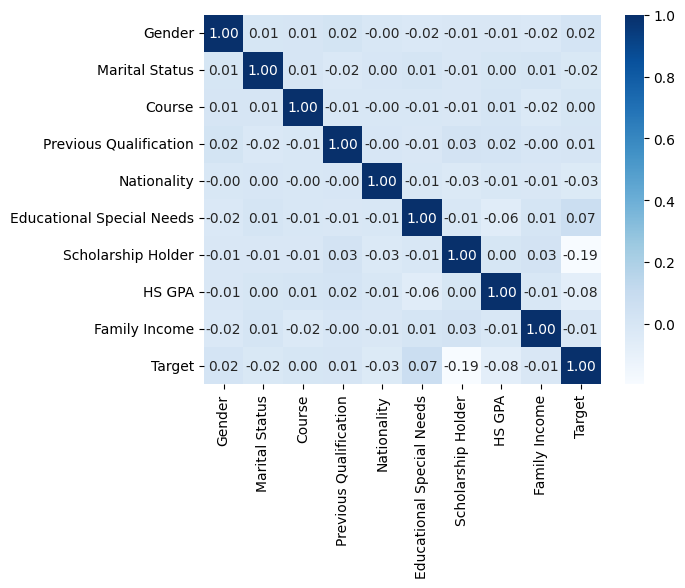

In [ ]:
## Correlation heatmap (only for numeric columns)
sns.heatmap(newdata.corr(), annot=True,fmt=".2f", cmap='Blues')

In [ ]:
# Multi regression Analysis
selected_columns = ['Gender', 'Marital Status', 'Course','Previous Qualification','Nationality','Educational Special Needs','Scholarship Holder', 'HS GPA', 'Family Income']
x = newdata[selected_columns]
y = newdata['Target']
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              1507.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        06:15:39   Log-Likelihood:                         -1116.2
No. Observations:                2600   AIC:                                      2250.
Df Residuals:                    2591   BIC:                                      2303.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

**Hyperparameter Tunning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' and 'y' are your feature matrix and target vector respectively
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score:  0.8639423076923076
Test set accuracy:  0.8557692307692307
